# Objective:To perform Exploratory Data Analysis(EDA) on IRIS dataset.

## 1.Load the Data:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iris=pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris=iris.drop('Id',axis=1)

use the function shape() to find the dimensions of the dataframe.

iris.shape

Use describe() function to see the statistics of the dataset such as mean, median, mode, standard deviation etc.

In [16]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


we can use info() to know about datatypes of features in dataframe.

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


if there are any null values present in the dataset,then we have to do data cleaning.

In [21]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [22]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Here we can clearly see that we don’t have any null values in our Dataset.


Now we will do some plotting/visualizing our data to understand the relation ship between the numerical features.I will use seaborn,matplotlib to visualize the data.

In seaborn library we have pairplot function which is very useful to scatter plot all the features at once instead of plotting them individually.


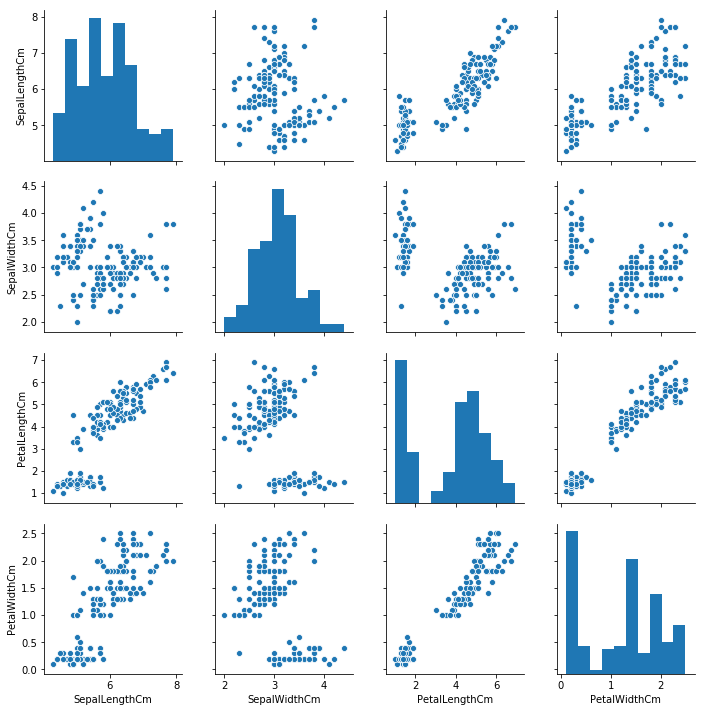

In [25]:
sns.pairplot(iris)

The Kind of plot for the diagonal subplots depend on diag_kind({‘auto’, ‘hist’, ‘kde’},. The default depends on whether "hue" is used 

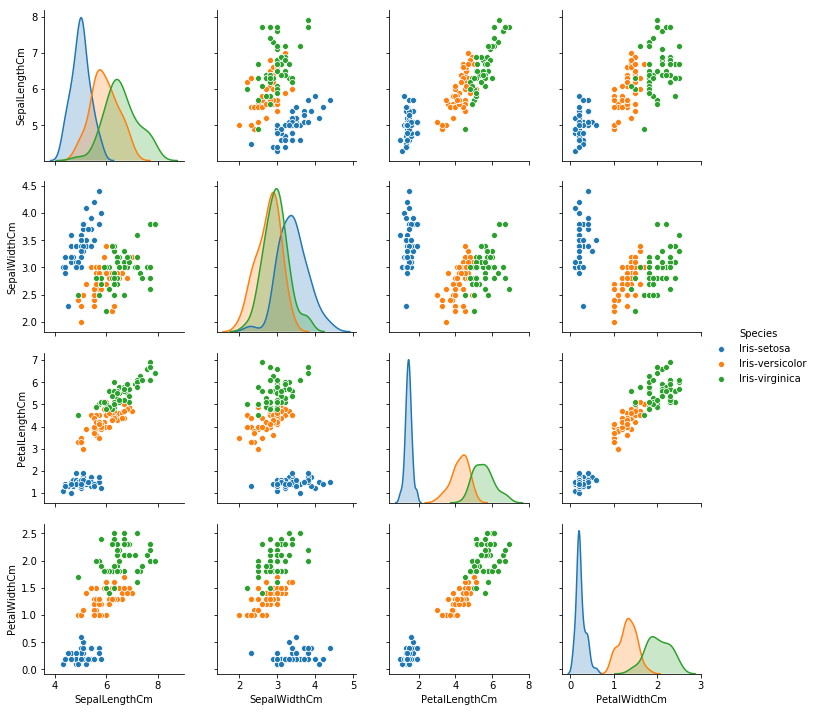

In [26]:
sns.pairplot(iris,hue='Species')

Use a different color palette for each Species.

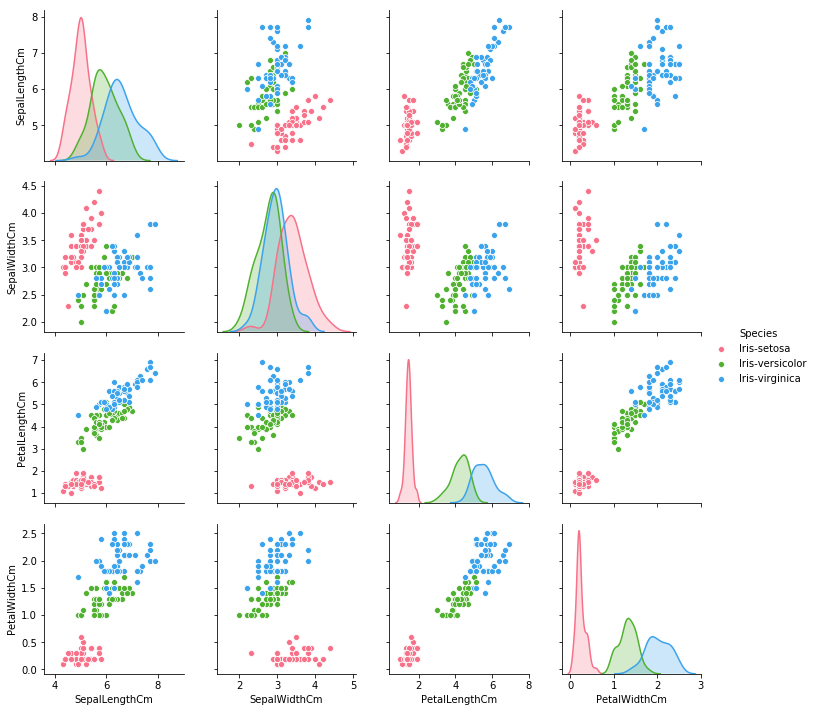

In [28]:
sns.pairplot(iris,hue='Species',palette="husl")

Use different markers for each level of the hue variable:

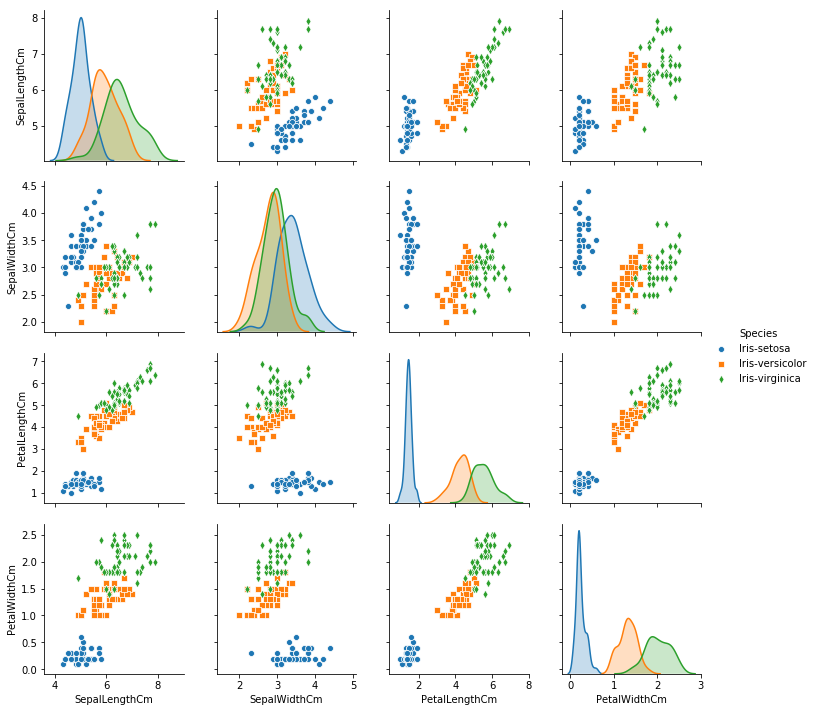

In [29]:
sns.pairplot(iris,hue='Species',markers=['o','s','d'])

Plot a subset of variables:

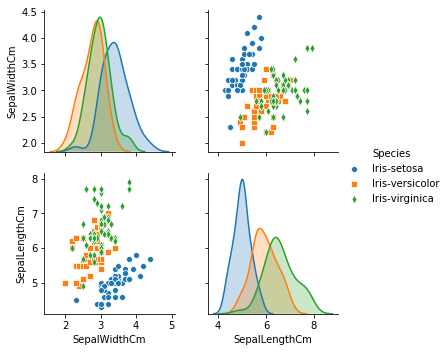

In [31]:
sns.pairplot(iris,hue='Species',markers=['o','s','d'],vars=['SepalWidthCm','SepalLengthCm'])

Draw a larger plot:

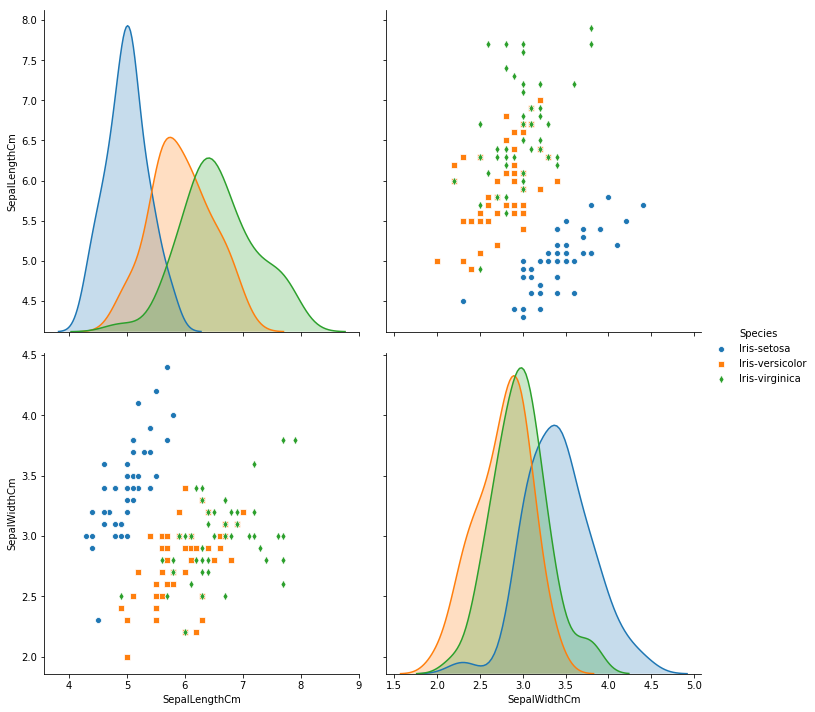

In [32]:
sns.pairplot(iris,hue='Species',markers=['o','s','d'],height=5,vars=['SepalLengthCm','SepalWidthCm'])

Use kernel density estimates for univariate plots:

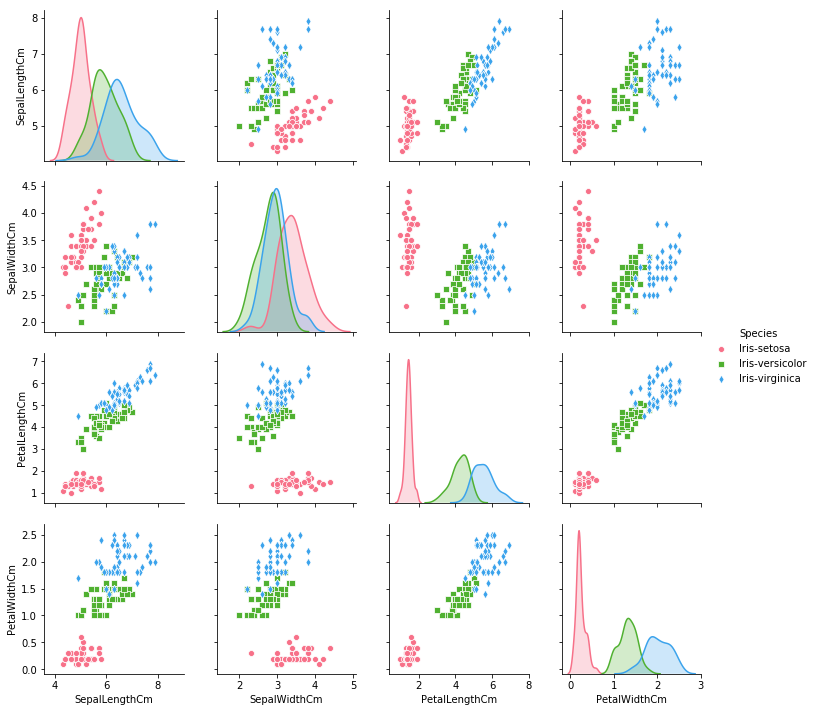

In [34]:
sns.pairplot(iris,hue='Species',markers=['o','s','d'],diag_kind='kde',palette='husl')

# Observations:


1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap
(almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.


Fit linear regression models to the scatter plots:

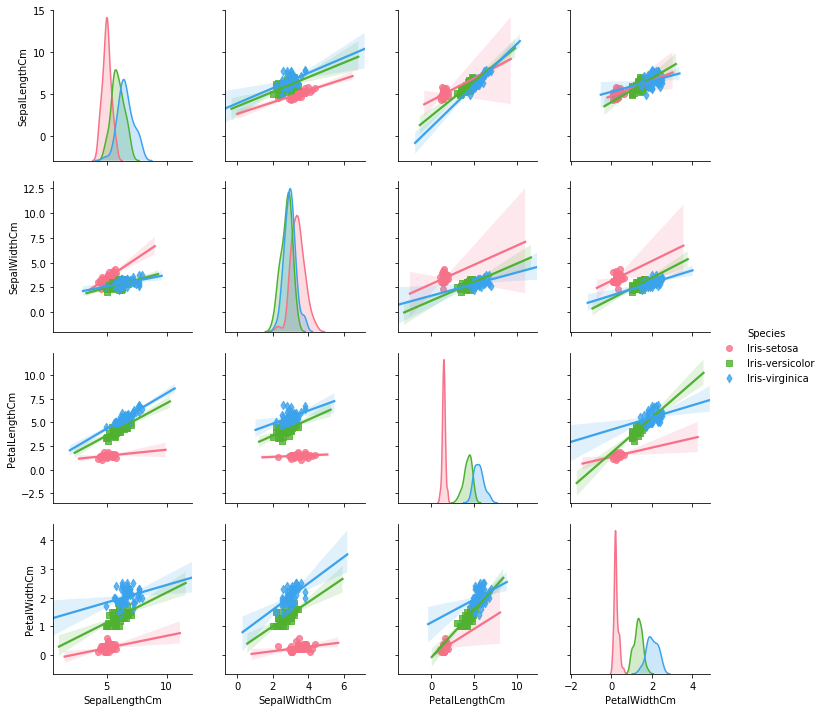

In [35]:
sns.pairplot(iris,hue='Species',markers=['o','s','d'],kind='reg',palette='husl',diag_kind='kde')

Now we will see how these features are correlated to each other using heatmap in seaborn library.

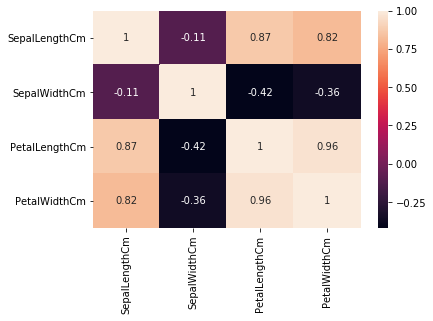

In [42]:
sns.heatmap(iris.corr(),annot=True)

Note:We can see that petal Length and petal Width features are slightly correlated with each other.

c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


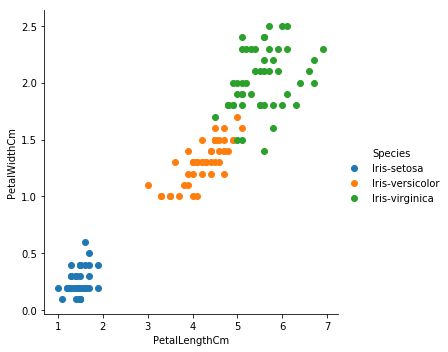

In [72]:
sns.FacetGrid(iris,hue='Species',size=5)\
   .map(plt.scatter,'PetalLengthCm','PetalWidthCm')\
   .add_legend()

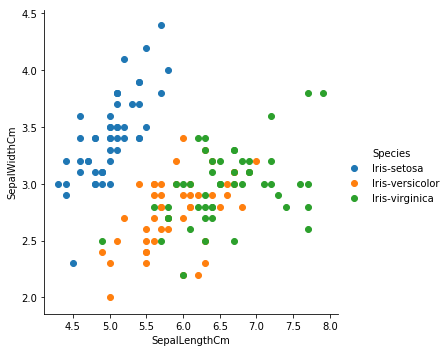

In [73]:
sns.FacetGrid(iris,hue='Species',size=5)\
   .map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
   .add_legend()

# Observation(s):

1. Using petallength and petalwidth features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.


# Histogram, PDF, CDF:

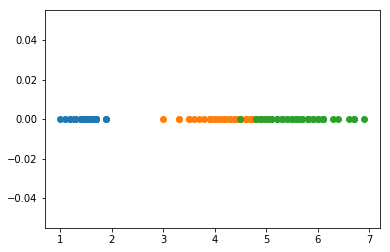

In [122]:
iris_setosa = iris[iris["Species"]=="Iris-setosa"]
iris_virginica = iris[iris["Species"]=="Iris-virginica"]
iris_versicolor = iris[iris["Species"]=="Iris-versicolor"]
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa['PetalLengthCm']),'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor['PetalLengthCm']),'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica['PetalLengthCm']),'o')
plt.show()

# Observation:

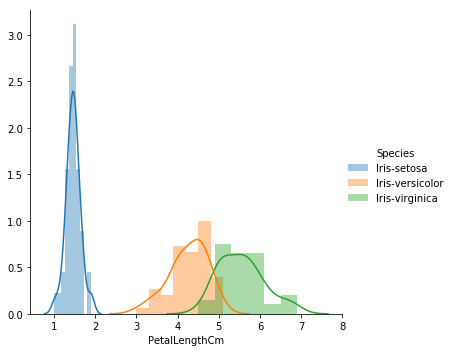

In [124]:
sns.FacetGrid(iris, hue="Species", size=5) \
.map(sns.distplot, "PetalLengthCm") \
.add_legend();
plt.show();

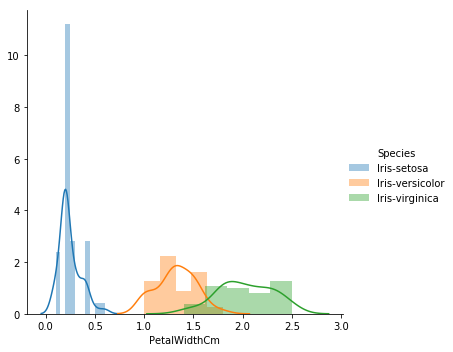

In [125]:
sns.FacetGrid(iris,hue='Species',size=5)\
.map(sns.distplot,'PetalWidthCm')\
.add_legend();


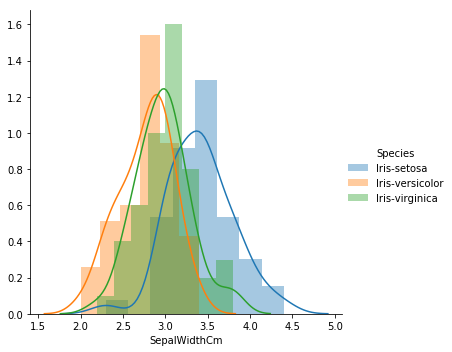

In [126]:
sns.FacetGrid(iris,hue='Species',size=5)\
.map(sns.distplot,'SepalWidthCm')\
.add_legend();


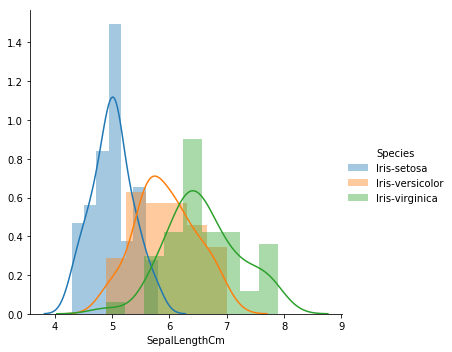

In [127]:
sns.FacetGrid(iris,hue='Species',size=5)\
.map(sns.distplot,'SepalLengthCm')\
.add_legend();


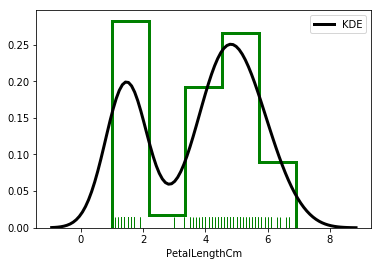

In [129]:
sns.distplot(iris['PetalLengthCm'], rug=True, rug_kws={"color": "g"},
               kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                hist_kws={"histtype": "step", "linewidth": 3,
                          "alpha": 1, "color": "g"})

# Box plot and Whiskers

Box-plot with whiskers: another method of visualizing the 1-D scatter plot more intuitively. use boxplot to see how the categorical feature “Species” is distributed with all other four input variables.


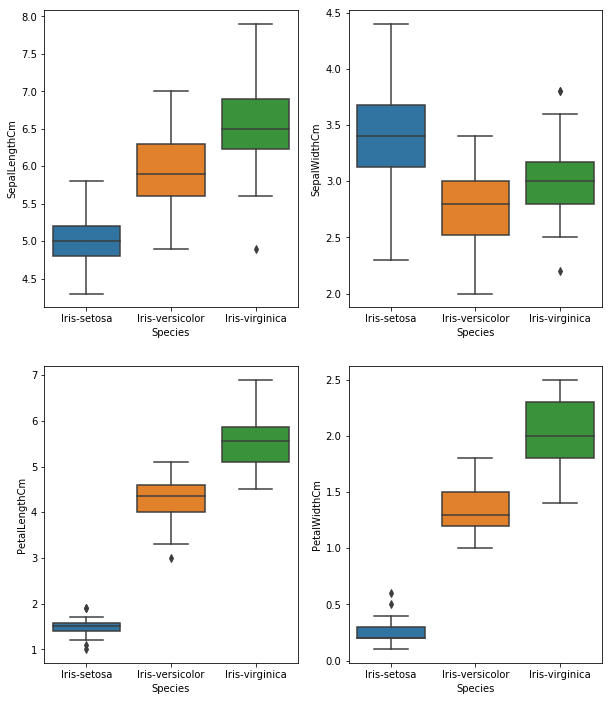

In [105]:
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,2) 
sns.boxplot(x='Species',y='SepalWidthCm',data=iris) 
plt.subplot(2,2,3) 
sns.boxplot(x='Species',y='PetalLengthCm',data=iris) 
plt.subplot(2,2,4) 
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.show()

# Violin plots:


Now let’s visualize the data with violin plot of all the input variables against output variable which is Species. The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density.


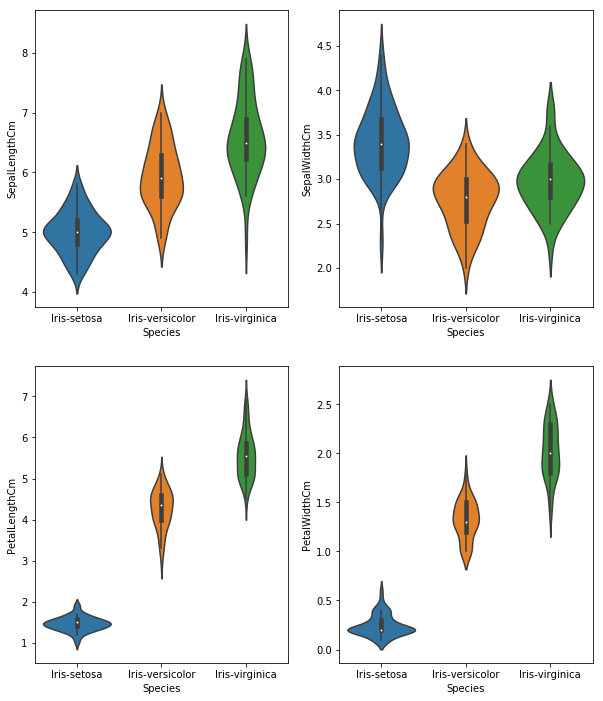

In [103]:
plt.figure(figsize=(10,12))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris) 
plt.subplot(2,2,2) 
sns.violinplot(x='Species',y='SepalWidthCm',data=iris) 
plt.subplot(2,2,3) 
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)

# Multivariate probability density, contour plot:

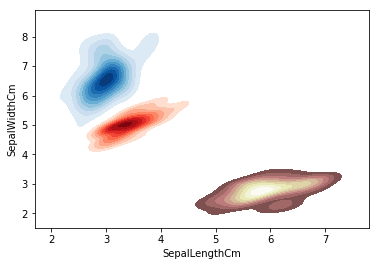

In [134]:
#kde plot
setosa=iris[iris['Species']=='Iris-setosa']
virginica=iris[iris['Species']=='Iris-virginica']
versicolor=iris[iris['Species']=='Iris-versicolor']
sns.kdeplot(setosa.SepalWidthCm, setosa.SepalLengthCm,
                 cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(virginica.SepalWidthCm, virginica.SepalLengthCm,
                     cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(versicolor.SepalLengthCm,versicolor.SepalWidthCm,
            cmap='pink',shade=True,shade_lowest=False)


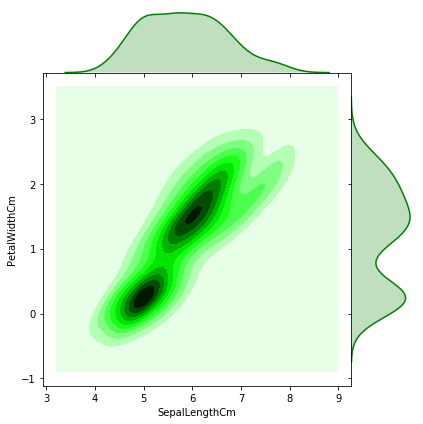

In [141]:
#jointplot
sns.jointplot('SepalLengthCm','PetalWidthCm',data=iris,kind='kde',space=0,color='g')